In [1]:
# To ignore warnings

import warnings
warnings.filterwarnings('ignore')

# Imports

In [2]:
# Imports

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import copy

# Custom Methods

## 'getDummies' Method

In [3]:
# Function to create dummy variables
def getDummies(database, column_name):
    
    # Creating dummy variables for the categorical variable
    dummy_df = pd.get_dummies(database[column_name], prefix=column_name , drop_first = True)
    
    # Concatenating dummy dataframe with the original dataframe
    database = pd.concat([database, dummy_df], axis=1)
    
    # Dropping categorical column for which dummy variables have been created
    database = database.drop(column_name, axis=1)
    
    return database

## 'get_corr_heatmap' Method

In [4]:
def get_corr_heatmap(data, cols, fig_size = (20,16)):
    
    figure = plt.subplots(figsize=fig_size)
    
    # Calculating the correlation b/w the given set of features
    corr_matrix = data[cols].corr()
    
    # Plotting the heatmap of the correlation matrix
    return sns.heatmap(corr_matrix, cmap="coolwarm", annot = True)

## 'metrics_calculator' Method

In [75]:
def metrics_calculator(actual_y, pred_y):
    
    # Calculating R square
    r_square = r2_score(actual_y, pred_y)

    # Calculating RSS
    rss = np.sum(np.square(actual_y - pred_y))

    # Calculating MSE
    mse = mean_squared_error(actual_y, pred_y)

    # Calculating RMSE
    rmse = mse**0.5
    
    return r_square, rss, mse, rmse

# Reading & Understanding Data

In [6]:
original_data = pd.read_csv('train.csv', na_values='NAN')
original_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
original_data.shape

(1460, 81)

In [8]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
original_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Findings

1. There are total '1460' records & '81' columns.
2. Column Types
    * Float Type  :  3
    * Integer Type: 35
    * Object Type : 43
3. 'SalePrice' is our target variable

# Data Cleaning & Manipulation

In [10]:
# Creating a copy of the original data so that we can always retrive original data if something goes wrong
data = copy.deepcopy(original_data)

## Dealing null values

In [12]:
# Checking for null values in the data
Total_null_values = data.apply(lambda row: row.isnull().sum()).sort_values(ascending = False)
col_null_percentages = round(data.apply(lambda row: row.isnull().sum() / len(row) * 100).sort_values(ascending = False),2)
null_value_data = pd.concat([Total_null_values, col_null_percentages], axis=1, keys=['Total','%'])
null_value_data

,Total,%
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
...,...,...
ExterQual,0,0.00
Exterior2nd,0,0.00
Exterior1st,0,0.00
RoofMatl,0,0.00


In [13]:
# Extracting all the columns which have atleast 1 null value
null_value_data[null_value_data['Total']>0]

,Total,%
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageYrBlt,81,5.55
GarageCond,81,5.55
GarageType,81,5.55
GarageFinish,81,5.55


After analysing data dictionary, we concluded that, in below mentioned columns, the null values are not actually missing but they have different meaning. Ex: Null values in 'PoolQC' column means that there is no pool. 

Therefore, we should replace these null values with 'None' in all the above columns.

In [14]:
# Creating columns in which null values has some meaning
null_has_meaning = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageCond', 'GarageType', 'GarageFinish', 'GarageQual', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual',
                    'BsmtCond', 'BsmtFinType1', 'MasVnrType']

# Filling null values with 'None'
for col in null_has_meaning:
    data[col].fillna('None', inplace=True)

In [15]:
# Checking for null values in the data
Total_null_values = data.apply(lambda row: row.isnull().sum()).sort_values(ascending = False)
col_null_percentages = round(data.apply(lambda row: row.isnull().sum() / len(row) * 100).sort_values(ascending = False),2)
null_value_data = pd.concat([Total_null_values, col_null_percentages], axis=1, keys=['Total','%'])
null_value_data

,Total,%
LotFrontage,259,17.74
GarageYrBlt,81,5.55
MasVnrArea,8,0.55
Electrical,1,0.07
KitchenAbvGr,0,0.00
...,...,...
ExterQual,0,0.00
MasVnrType,0,0.00
Exterior2nd,0,0.00
Exterior1st,0,0.00


In [16]:
# Extracting all the columns which have atleast 1 null value
null_value_data[null_value_data['Total']>0]

,Total,%
LotFrontage,259,17.74
GarageYrBlt,81,5.55
MasVnrArea,8,0.55
Electrical,1,0.07


As 'LotFrontage' has too many null values and imputing might disturb the distribution. Therefore, it is better to drop this column.

Since, the remaining column has very low missing values, therefore, it is safe to impute them. We can impute median value so that it 'll not be impacted by any outlier.

In [17]:
data.drop('LotFrontage', axis=1, inplace=True)

### Analysing each col 1-by-1

In [18]:
data['GarageYrBlt'].value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1927.0     1
1900.0     1
1906.0     1
1908.0     1
1933.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

In [19]:
data['MasVnrArea'].value_counts()

0.0      861
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: MasVnrArea, Length: 327, dtype: int64

In [20]:
data['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

We 'll do value imputation in 'GarageYrBlt' & 'MasVnrArea' column with median value.

For 'Electrical' column, as there are too many unique values & it also has just one missing value, therefore, we 'll drop this row.

#### Imputing columns

In [21]:
data['GarageYrBlt'].fillna(data['GarageYrBlt'].median(), inplace=True)
data['MasVnrArea'].fillna(data['MasVnrArea'].median(), inplace=True)

#### Dropping row

In [22]:
# This 'll drop all the rows which have null values
data.dropna(inplace=True)

In [23]:
# Checking for null values in the data
Total_null_values = data.apply(lambda row: row.isnull().sum()).sort_values(ascending = False)
col_null_percentages = data.apply(lambda row: row.isnull().sum() / len(row) * 100).sort_values(ascending = False)
null_value_data = pd.concat([Total_null_values, col_null_percentages], axis=1, keys=['Total','%'])
null_value_data

,Total,%
Id,0,0.0
MSSubClass,0,0.0
GarageYrBlt,0,0.0
GarageType,0,0.0
FireplaceQu,0,0.0
...,...,...
MasVnrArea,0,0.0
MasVnrType,0,0.0
Exterior2nd,0,0.0
Exterior1st,0,0.0


Now, there are no null values in the data

In [24]:
# Dropping 'Id' as it's just a number and won't add any value to the data
data.drop('Id', axis=1, inplace=True)

In [25]:
data.shape

(1459, 79)

## Dealing with Outliers

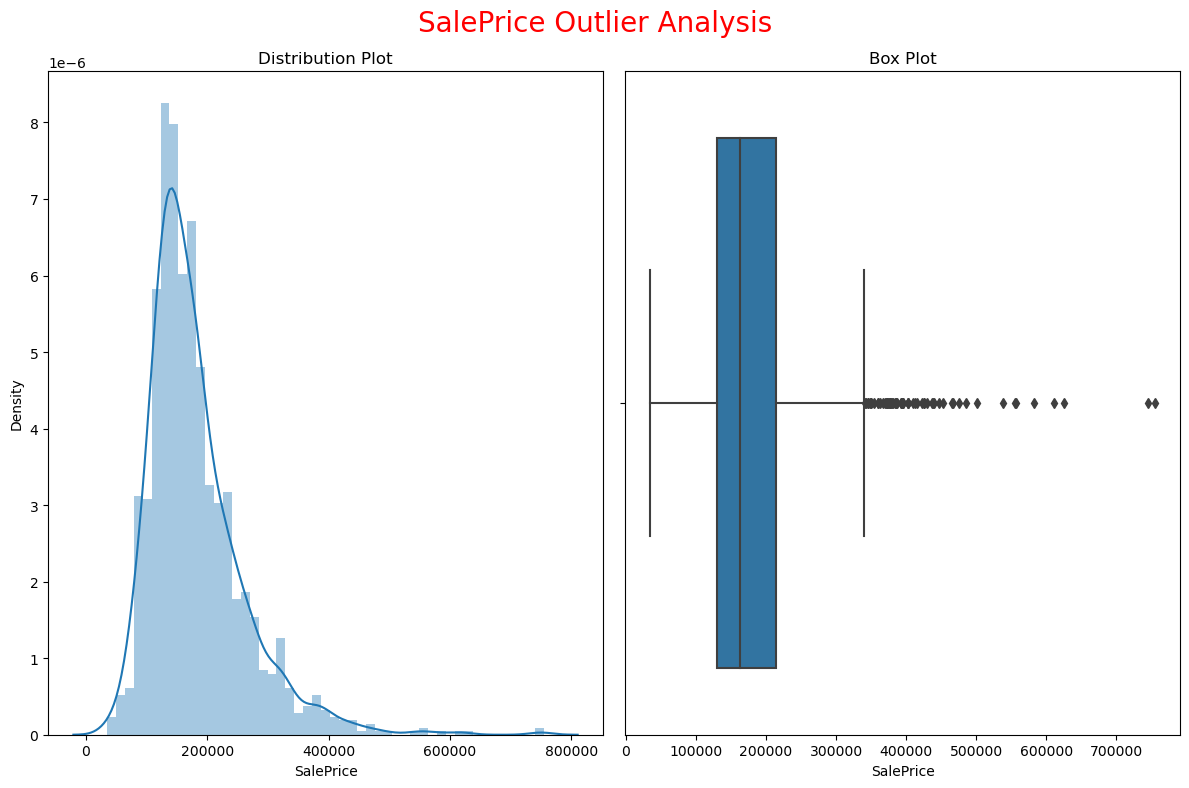

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(12, 8))

# Plotting histogram
sns.distplot(data['SalePrice'], ax=axs[0])
axs[0].set_title('Distribution Plot')

# Plotting box plot
sns.boxplot(data['SalePrice'], ax=axs[1])
axs[1].set_title('Box Plot')

# set figure title
fig.suptitle('SalePrice Outlier Analysis', fontsize=20, color='r')
plt.tight_layout()
plt.show()

We can notice that the distribution plot is skewed and the box plot has lot of data points beyond the upper extreme. They both indicate the presence of outliers.

These type of outliers can be handled via data transformation. Let's try that and observe the changes in the above plot.

In [28]:
# Transforming SalePrice
data['Transformed_SalePrice'] = np.log(data['SalePrice'])
data['Transformed_SalePrice']

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: Transformed_SalePrice, Length: 1459, dtype: float64

In [29]:
# Dropping 'SalePrice'
data.drop('SalePrice', axis=1, inplace=True)
data.shape

(1459, 79)

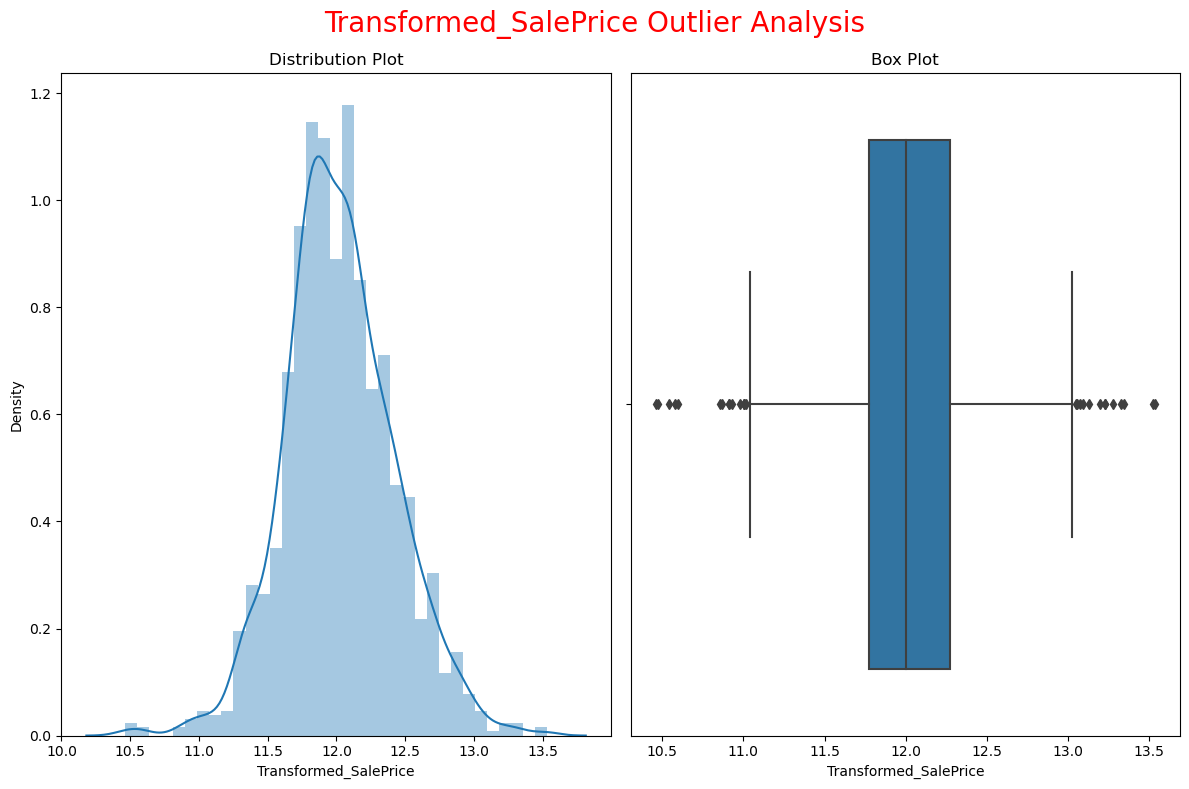

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(12, 8))

# Plotting histogram
sns.distplot(data['Transformed_SalePrice'], ax=axs[0])
axs[0].set_title('Distribution Plot')

# Plotting box plot
sns.boxplot(data['Transformed_SalePrice'], ax=axs[1])
axs[1].set_title('Box Plot')

# set figure title
fig.suptitle('Transformed_SalePrice Outlier Analysis', fontsize=20, color='r')
plt.tight_layout()
plt.show()

Now, we can notice that though there are outliers but not extreme ones & distribution plot is also normal.

## Checking Duplicates

In [31]:
no_of_duplicates = data.duplicated().sum()
no_of_duplicates

0

# EDA

## Categorizing Data - Numerical & Categorical

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MSSubClass             1459 non-null   int64  
 1   MSZoning               1459 non-null   object 
 2   LotArea                1459 non-null   int64  
 3   Street                 1459 non-null   object 
 4   Alley                  1459 non-null   object 
 5   LotShape               1459 non-null   object 
 6   LandContour            1459 non-null   object 
 7   Utilities              1459 non-null   object 
 8   LotConfig              1459 non-null   object 
 9   LandSlope              1459 non-null   object 
 10  Neighborhood           1459 non-null   object 
 11  Condition1             1459 non-null   object 
 12  Condition2             1459 non-null   object 
 13  BldgType               1459 non-null   object 
 14  HouseStyle             1459 non-null   object 
 15  Over

### Numerical Columns

In [33]:
numerical_data = data.select_dtypes(include=['int64', 'float64'])
numerical_data

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Transformed_SalePrice
0,60,8450,7,5,2003,2003,196.0,706,0,150,...,0,61,0,0,0,0,0,2,2008,12.247694
1,20,9600,6,8,1976,1976,0.0,978,0,284,...,298,0,0,0,0,0,0,5,2007,12.109011
2,60,11250,7,5,2001,2002,162.0,486,0,434,...,0,42,0,0,0,0,0,9,2008,12.317167
3,70,9550,7,5,1915,1970,0.0,216,0,540,...,0,35,272,0,0,0,0,2,2006,11.849398
4,60,14260,8,5,2000,2000,350.0,655,0,490,...,192,84,0,0,0,0,0,12,2008,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,2000,0.0,0,0,953,...,0,40,0,0,0,0,0,8,2007,12.072541
1456,20,13175,6,6,1978,1988,119.0,790,163,589,...,349,0,0,0,0,0,0,2,2010,12.254863
1457,70,9042,7,9,1941,2006,0.0,275,0,877,...,0,60,0,0,0,0,2500,5,2010,12.493130
1458,20,9717,5,6,1950,1996,0.0,49,1029,0,...,366,0,112,0,0,0,0,4,2010,11.864462


In [34]:
numerical_data.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'Transformed_SalePrice'],
      dtype='object')

Now, there are some numerical columns which are actually categorial. So, we 'll find out actual numerical columns.

In [35]:
actual_numeric_cols = ['LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
                       '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'Transformed_SalePrice']

cat_nominal_cols = ['MSSubClass']
cat_ordinal_cols = ['OverallQual', 'OverallCond', 'MoSold', 'YrSold', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars']

print('No. of actual numeric columns: ',len(actual_numeric_cols))

No. of actual numeric columns:  22


In [36]:
data[actual_numeric_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LotArea                1459 non-null   int64  
 1   YearBuilt              1459 non-null   int64  
 2   YearRemodAdd           1459 non-null   int64  
 3   MasVnrArea             1459 non-null   float64
 4   BsmtFinSF1             1459 non-null   int64  
 5   BsmtFinSF2             1459 non-null   int64  
 6   BsmtUnfSF              1459 non-null   int64  
 7   TotalBsmtSF            1459 non-null   int64  
 8   1stFlrSF               1459 non-null   int64  
 9   2ndFlrSF               1459 non-null   int64  
 10  LowQualFinSF           1459 non-null   int64  
 11  GrLivArea              1459 non-null   int64  
 12  GarageYrBlt            1459 non-null   float64
 13  GarageArea             1459 non-null   int64  
 14  WoodDeckSF             1459 non-null   int64  
 15  Open

### Categorical Columns

In [37]:
categorical_data = data.select_dtypes(include='object')
categorical_data

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
1,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
2,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
3,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,None,None,None,WD,Abnorml
4,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
1456,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,None,MnPrv,None,WD,Normal
1457,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,None,GdPrv,Shed,WD,Normal
1458,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,None,None,None,WD,Normal


Now, we 'll divide these columns into ordinal & nominal data

In [38]:
categorical_data.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [39]:
cat_nominal_cols = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2' ,'BldgType' , 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
                     'Heating', 'CentralAir', 'Electrical', 'GarageType', 'PavedDrive', 'MiscFeature', 'SaleType', 'SaleCondition']

cat_ordinal_cols = ['OverallQual', 'OverallCond', 'MoSold', 'YrSold', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
                    'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence']

print('No of Nominal Categorical Data: ', len(cat_nominal_cols))
print('No of Ordinal Categorical Data: ', len(cat_ordinal_cols))

No of Nominal Categorical Data:  27
No of Ordinal Categorical Data:  30


## Numerical Data Analysis

### Pair Plot

In [ ]:
sns.pairplot(data[actual_numeric_cols])

### Correlation Heatmap

<AxesSubplot:>

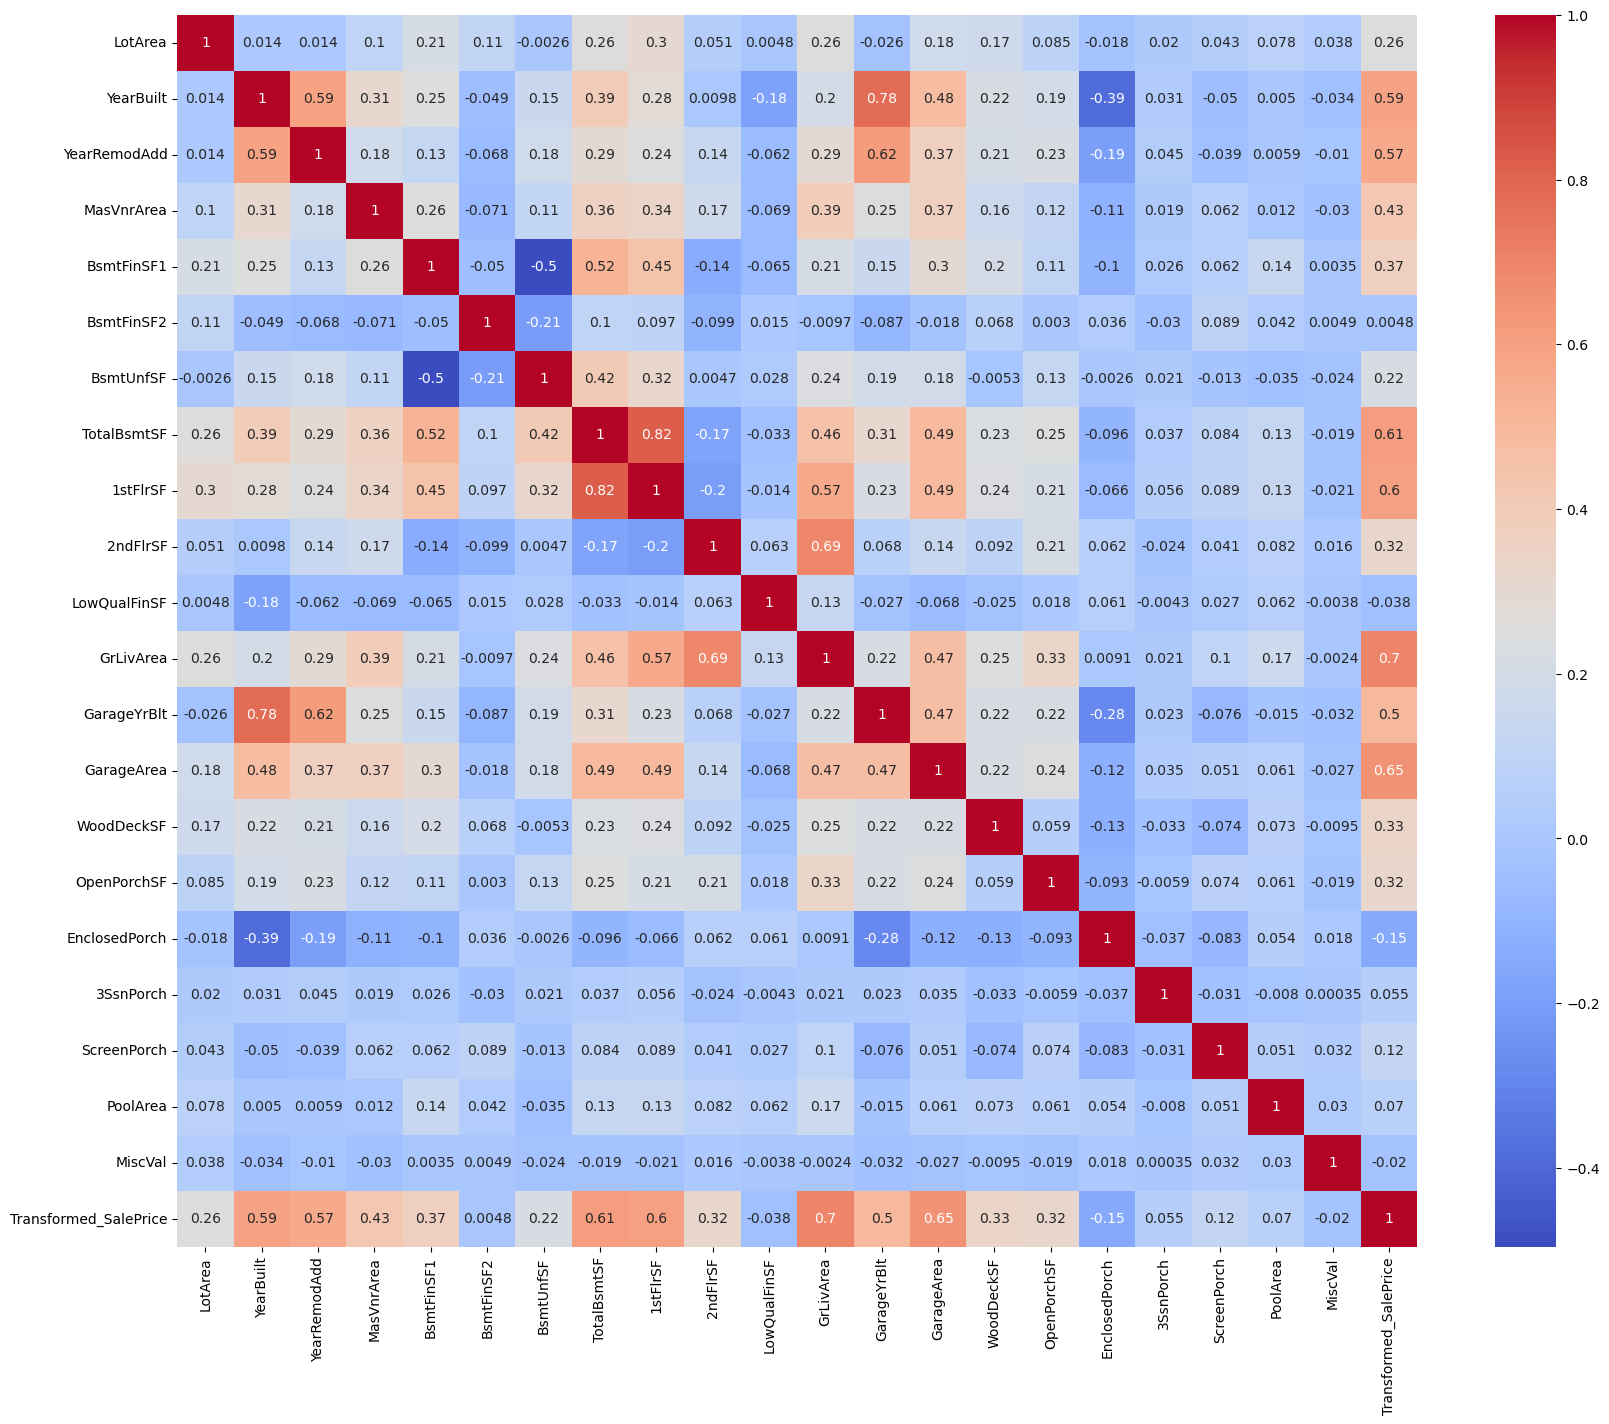

In [40]:
get_corr_heatmap(data, actual_numeric_cols)

### Findings

* By analysing heatmap & pairplot, these our some important columns ( or features) which 'll have considerable impact on the output variable:
    1. 'YearBuilt'
    2. 'YearRemodAdd'
    3. 'MasVnrArea'
    4. 'TotalBsmtSF'
    5. '1stFlrSF'
    6. 'GrLivArea'
    7. 'GarageYrBlt'
    8. 'GarageArea'

## Categorical Data Analysis

### Nominal Columns

In [41]:
data_for_analysis = pd.concat([data[cat_nominal_cols], data['Transformed_SalePrice']], axis=1)
data_for_analysis

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,Neighborhood,Condition1,...,Foundation,Heating,CentralAir,Electrical,GarageType,PavedDrive,MiscFeature,SaleType,SaleCondition,Transformed_SalePrice
0,60,RL,Pave,None,Reg,Lvl,AllPub,Inside,CollgCr,Norm,...,PConc,GasA,Y,SBrkr,Attchd,Y,None,WD,Normal,12.247694
1,20,RL,Pave,None,Reg,Lvl,AllPub,FR2,Veenker,Feedr,...,CBlock,GasA,Y,SBrkr,Attchd,Y,None,WD,Normal,12.109011
2,60,RL,Pave,None,IR1,Lvl,AllPub,Inside,CollgCr,Norm,...,PConc,GasA,Y,SBrkr,Attchd,Y,None,WD,Normal,12.317167
3,70,RL,Pave,None,IR1,Lvl,AllPub,Corner,Crawfor,Norm,...,BrkTil,GasA,Y,SBrkr,Detchd,Y,None,WD,Abnorml,11.849398
4,60,RL,Pave,None,IR1,Lvl,AllPub,FR2,NoRidge,Norm,...,PConc,GasA,Y,SBrkr,Attchd,Y,None,WD,Normal,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gilbert,Norm,...,PConc,GasA,Y,SBrkr,Attchd,Y,None,WD,Normal,12.072541
1456,20,RL,Pave,None,Reg,Lvl,AllPub,Inside,NWAmes,Norm,...,CBlock,GasA,Y,SBrkr,Attchd,Y,None,WD,Normal,12.254863
1457,70,RL,Pave,None,Reg,Lvl,AllPub,Inside,Crawfor,Norm,...,Stone,GasA,Y,SBrkr,Attchd,Y,Shed,WD,Normal,12.493130
1458,20,RL,Pave,None,Reg,Lvl,AllPub,Inside,NAmes,Norm,...,CBlock,GasA,Y,FuseA,Attchd,Y,None,WD,Normal,11.864462


In [ ]:
plt.figure(figsize=(36, 72))

for i in range(1,28):
    col = cat_nominal_cols[i-1]
    plt.subplot(9,3,i)
    sns.boxplot(data= data_for_analysis, x = col, y = 'Transformed_SalePrice')

#### Findings

Here are some fo the prominent findings out of many:

1. Houses with Paved ('Pave') street have higher median selling price compared to Gravel ('Grvl') street.
2. Houses with all utilities (Electricity, Gas, Water Tank & Septic Tank) has higher median selling price compared to the houses that lacks any one of them.
3. Houses with Central Air Conditioning have higher median selling price compared to the houses that doesn't have that.
4. As driveway pavement improves (No pavement, Partially Paved & Fully Paved), the median selling price of the house improves.

### Ordinal Columns

In [42]:
data_for_analysis_2 = pd.concat([data[cat_ordinal_cols], data['Transformed_SalePrice']], axis=1)
data_for_analysis_2

,OverallQual,OverallCond,MoSold,YrSold,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,...,HeatingQC,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,Transformed_SalePrice
0,7,5,2,2008,1,0,2,1,3,1,...,Ex,Gd,Typ,None,RFn,TA,TA,None,None,12.247694
1,6,8,5,2007,0,1,2,0,3,1,...,Ex,TA,Typ,TA,RFn,TA,TA,None,None,12.109011
2,7,5,9,2008,1,0,2,1,3,1,...,Ex,Gd,Typ,TA,RFn,TA,TA,None,None,12.317167
3,7,5,2,2006,1,0,1,0,3,1,...,Gd,Gd,Typ,Gd,Unf,TA,TA,None,None,11.849398
4,8,5,12,2008,1,0,2,1,4,1,...,Ex,Gd,Typ,TA,RFn,TA,TA,None,None,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,5,8,2007,0,0,2,1,3,1,...,Ex,TA,Typ,TA,RFn,TA,TA,None,None,12.072541
1456,6,6,2,2010,1,0,2,0,3,1,...,TA,TA,Min1,TA,Unf,TA,TA,None,MnPrv,12.254863
1457,7,9,5,2010,0,0,2,0,4,1,...,Ex,Gd,Typ,Gd,RFn,TA,TA,None,GdPrv,12.493130
1458,5,6,4,2010,1,0,1,0,2,1,...,Gd,Gd,Typ,None,Unf,TA,TA,None,None,11.864462


#### Data Mapping

Mapping categorical values to numeric values

In [43]:
data['Fence'].value_counts()

None     1178
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64

In [44]:
Fence_dict = {
    'GdPrv': 4,
    'MnPrv': 3,
    'GdWo' : 2,
    'MnWw' : 1,
    'None' : 0    
}

data['Fence'] = data['Fence'].map(Fence_dict)
data['Fence'].value_counts()

0    1178
3     157
4      59
2      54
1      11
Name: Fence, dtype: int64

In [45]:
data['Functional'].value_counts()

Typ     1359
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

In [46]:
Functional_dict = {
    'Typ' : 8,
    'Min1': 7,
    'Min2': 6,
    'Mod' : 5,
    'Maj1': 4,
    'Maj2': 3,
    'Sev' : 2,
    'Sal' : 1    
}


data['Functional'] = data['Functional'].map(Functional_dict)
data['Functional'].value_counts()

8    1359
6      34
7      31
5      15
4      14
3       5
2       1
Name: Functional, dtype: int64

In [47]:
data['GarageFinish'].value_counts()

Unf     605
RFn     422
Fin     351
None     81
Name: GarageFinish, dtype: int64

In [48]:
GarageFinish_dict = {
    'Fin'  : 4,
    'RFn'  : 3,
    'Unf'  : 2,
    'None' : 1    
}

data['GarageFinish'] = data['GarageFinish'].map(GarageFinish_dict)
data['GarageFinish'].value_counts()

2    605
3    422
4    351
1     81
Name: GarageFinish, dtype: int64

In [49]:
data['BsmtFinType1'].value_counts()

Unf     429
GLQ     418
ALQ     220
BLQ     148
Rec     133
LwQ      74
None     37
Name: BsmtFinType1, dtype: int64

In [50]:
data['BsmtFinType2'].value_counts()

Unf     1255
Rec       54
LwQ       46
None      38
BLQ       33
ALQ       19
GLQ       14
Name: BsmtFinType2, dtype: int64

In [51]:
BsmtFinType_1_2__dict = {
    'GLQ' : 6,
    'ALQ' : 5,
    'BLQ' : 4,
    'Rec' : 3,
    'LwQ' : 2,
    'Unf' : 1,
    'None': 0
}

data['BsmtFinType1'] = data['BsmtFinType1'].map(BsmtFinType_1_2__dict)
data['BsmtFinType2'] = data['BsmtFinType2'].map(BsmtFinType_1_2__dict)

In [52]:
data['BsmtFinType1'].value_counts()

1    429
6    418
5    220
4    148
3    133
2     74
0     37
Name: BsmtFinType1, dtype: int64

In [53]:
data['BsmtFinType2'].value_counts()

1    1255
3      54
2      46
0      38
4      33
5      19
6      14
Name: BsmtFinType2, dtype: int64

In [54]:
data['LandSlope'].value_counts()

Gtl    1381
Mod      65
Sev      13
Name: LandSlope, dtype: int64

In [55]:
LandSlope_dict = {
    'Gtl' : 1,
    'Mod' : 2,
    'Sev' : 3
}

data['LandSlope'] = data['LandSlope'].map(LandSlope_dict)
data['LandSlope'].value_counts()

1    1381
2      65
3      13
Name: LandSlope, dtype: int64

In [56]:
data['BsmtExposure'].value_counts()

No      952
Av      221
Gd      134
Mn      114
None     38
Name: BsmtExposure, dtype: int64

In [57]:
BsmtExposure_dict = {
    'Gd'   : 4,
    'Av'   : 3,
    'Mn'   : 2,
    'No'   : 1,
    'None' : 0
}

data['BsmtExposure'] = data['BsmtExposure'].map(BsmtExposure_dict)
data['BsmtExposure'].value_counts()

1    952
3    221
4    134
2    114
0     38
Name: BsmtExposure, dtype: int64

In [58]:
cols_with_common_dict = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']

Common_dict = {
    'Ex' : 5,
    'Gd' : 4,
    'TA' : 3,
    'Fa' : 2,
    'Po' : 1,
    'None' : 0
}

In [59]:
print('Value count of cols_with_common_dict')
print('=====================================\n\n')
for col in cols_with_common_dict:
    print(f'Value count of {col} before mapping:')
    print(data[col].value_counts())
    print('\n')
    data[col] = data[col].map(Common_dict)
    print(f'\nValue count of {col} after mapping:')
    print(data[col].value_counts())    
    print('-----------------------------\n')

Value count of cols_with_common_dict


Value count of ExterQual before mapping:
TA    905
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64



Value count of ExterQual after mapping:
3    905
4    488
5     52
2     14
Name: ExterQual, dtype: int64
-----------------------------

Value count of ExterCond before mapping:
TA    1281
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64



Value count of ExterCond after mapping:
3    1281
4     146
2      28
5       3
1       1
Name: ExterCond, dtype: int64
-----------------------------

Value count of BsmtQual before mapping:
TA      649
Gd      617
Ex      121
None     37
Fa       35
Name: BsmtQual, dtype: int64



Value count of BsmtQual after mapping:
3    649
4    617
5    121
0     37
2     35
Name: BsmtQual, dtype: int64
-----------------------------

Value count of BsmtCond before mapping:
TA      1310
Gd        65
Fa        45
None      37
Po         2
Name: BsmtCond, dtype: int64



Value count of Bs

#### Data Visualization

In [60]:
len(cat_ordinal_cols)

30

In [ ]:
plt.figure(figsize=(36, 72))

for i in range(1,31):
    col = cat_ordinal_cols[i-1]
    plt.subplot(10,3,i)
    sns.boxplot(data= data, x = col, y = 'Transformed_SalePrice')

#### Findings

Out of all the findings, here are some prominent ones:

1. As overall quality ('OverallQual') of the house increases, sale price of the house increases.
2. As total no. of rooms above ground floor increases, the sale price of the house increases.
3. As the garage car capacity ('GarageCars') increases, the sale price of the house increases.
4. As the quality of the house's exterior material improves ('ExterQual'), the sale price of the house increases.
5. As the height of the basement ('BsmtQual') increases, the sale price of the house increases.
6. As the quality of the kitchen ('KitchenQual') improves, the sale price of the house increases.

# Data Preparation

## Creating Dummy Variables

We 'll create dummy variables for categorical nominal columns (i.e. 'cat_nominal_cols'). There are 27 such columns.

In [61]:
no_of_cols_before_dummy_variables = data.shape[1]
no_of_cols_before_dummy_variables

79

In [62]:
# Creating dummy variables
for col in cat_nominal_cols:
    data = getDummies(data, col)
data

,LotArea,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,8450,1,7,5,2003,2003,196.0,4,3,4,...,0,0,0,0,1,0,0,0,1,0
1,9600,1,6,8,1976,1976,0.0,3,3,4,...,0,0,0,0,1,0,0,0,1,0
2,11250,1,7,5,2001,2002,162.0,4,3,4,...,0,0,0,0,1,0,0,0,1,0
3,9550,1,7,5,1915,1970,0.0,3,3,3,...,0,0,0,0,1,0,0,0,0,0
4,14260,1,8,5,2000,2000,350.0,4,3,4,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,1,6,5,1999,2000,0.0,3,3,4,...,0,0,0,0,1,0,0,0,1,0
1456,13175,1,6,6,1978,1988,119.0,3,3,4,...,0,0,0,0,1,0,0,0,1,0
1457,9042,1,7,9,1941,2006,0.0,5,4,3,...,0,0,0,0,1,0,0,0,1,0
1458,9717,1,5,6,1950,1996,0.0,3,3,3,...,0,0,0,0,1,0,0,0,1,0


In [63]:
no_of_cols_after_dummy_variables = data.shape[1]
total_dummy_variables_created = no_of_cols_after_dummy_variables - no_of_cols_before_dummy_variables
total_dummy_variables_created

139

## Train-Test Split

In [64]:
# Creating a backup of this final data
backup_data = copy.deepcopy(data)
backup_data

,LotArea,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,8450,1,7,5,2003,2003,196.0,4,3,4,...,0,0,0,0,1,0,0,0,1,0
1,9600,1,6,8,1976,1976,0.0,3,3,4,...,0,0,0,0,1,0,0,0,1,0
2,11250,1,7,5,2001,2002,162.0,4,3,4,...,0,0,0,0,1,0,0,0,1,0
3,9550,1,7,5,1915,1970,0.0,3,3,3,...,0,0,0,0,1,0,0,0,0,0
4,14260,1,8,5,2000,2000,350.0,4,3,4,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,1,6,5,1999,2000,0.0,3,3,4,...,0,0,0,0,1,0,0,0,1,0
1456,13175,1,6,6,1978,1988,119.0,3,3,4,...,0,0,0,0,1,0,0,0,1,0
1457,9042,1,7,9,1941,2006,0.0,5,4,3,...,0,0,0,0,1,0,0,0,1,0
1458,9717,1,5,6,1950,1996,0.0,3,3,3,...,0,0,0,0,1,0,0,0,1,0


In [65]:
# Creating X & y for Data Spliting
X = data.drop('Transformed_SalePrice', axis=1)
y = data['Transformed_SalePrice']

In [66]:
# Data Splitting
from sklearn.model_selection import train_test_split

df_train_X, df_test_X, df_train_y, df_test_y = train_test_split(X, y, train_size=0.7, random_state=10)

In [67]:
# Training Data
print('\n--- X ---\n')
print(df_train_X.head())
print('\nShape: ',df_train_X.shape)

print('\n\n--- y ---\n')
print(df_train_y.head())
print('\nShape: ',df_train_y.shape)


--- X ---

     LotArea  LandSlope  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
912     6120          1            5            7       1925          1950   
373    10634          1            5            6       1953          1953   
20     14215          1            8            5       2005          2006   
800    12798          2            6            5       1997          1997   
152    14803          1            6            5       1971          1971   

     MasVnrArea  ExterQual  ExterCond  BsmtQual  ...  SaleType_ConLI  \
912         0.0          3          3         3  ...               0   
373         0.0          3          3         3  ...               0   
20        380.0          4          3         5  ...               0   
800         0.0          3          3         4  ...               0   
152       252.0          3          3         3  ...               0   

     SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
912               0   

In [68]:
# Test Data
print('\n--- X ---\n')
print(df_test_X.head())
print('\nShape: ',df_test_X.shape)

print('\n\n--- y ---\n')
print(df_test_y.head())
print('\nShape: ',df_test_y.shape)


--- X ---

     LotArea  LandSlope  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
854    17920          1            5            4       1955          1974   
381     7200          1            7            5       2006          2006   
816    11425          1            5            6       1954          1954   
577    11777          1            5            6       1966          1966   
35     13418          1            8            5       2004          2005   

     MasVnrArea  ExterQual  ExterCond  BsmtQual  ...  SaleType_ConLI  \
854         0.0          3          3         3  ...               0   
381         0.0          4          3         4  ...               0   
816         0.0          3          3         3  ...               0   
577        97.0          3          3         3  ...               0   
35        132.0          4          3         5  ...               0   

     SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
854               0   

## Feature Scaling

In [69]:
from sklearn.preprocessing import MinMaxScaler

# Initializing MinMaxScaler object
scaler = MinMaxScaler()

### Training Data

In [70]:
# Scaling training data

# Preserving column names
col_names = df_train_X.columns

# Performing feature scaling
df_train_X = scaler.fit_transform(df_train_X)

# Transforming to Dataframe
df_train_X = pd.DataFrame(df_train_X, columns=col_names)

df_train_X

,LotArea,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.022529,0.0,0.285714,0.714286,0.384058,0.000000,0.000000,0.333333,0.50,0.6,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.043628,0.0,0.285714,0.571429,0.586957,0.050000,0.000000,0.333333,0.50,0.6,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.060366,0.0,0.714286,0.428571,0.963768,0.933333,0.237500,0.666667,0.50,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.053743,0.5,0.428571,0.428571,0.905797,0.783333,0.000000,0.333333,0.50,0.8,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.063114,0.0,0.428571,0.428571,0.717391,0.350000,0.157500,0.333333,0.50,0.6,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016,0.012830,0.0,0.571429,0.428571,0.971014,0.933333,0.028125,0.666667,0.50,0.8,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1017,0.045820,0.0,0.571429,0.428571,0.971014,0.933333,0.000000,0.666667,0.50,0.8,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1018,0.063792,0.0,0.857143,0.428571,0.985507,0.966667,0.167500,1.000000,0.50,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1019,0.035991,0.0,0.571429,1.000000,0.347826,0.633333,0.000000,0.333333,0.75,0.6,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


### Test Data

In [71]:
# Scaling Test Data

# Preserving column names
col_names = df_test_X.columns

# Performing feature scaling
df_test_X = scaler.transform(df_test_X)

# Transforming to Dataframe
df_test_X = pd.DataFrame(df_test_X, columns=col_names)

df_test_X

,LotArea,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.077684,0.0,0.285714,0.285714,0.601449,0.400000,0.000000,0.333333,0.50,0.6,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.027577,0.0,0.571429,0.428571,0.971014,0.933333,0.000000,0.666667,0.50,0.8,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.047325,0.0,0.285714,0.571429,0.594203,0.066667,0.000000,0.333333,0.50,0.6,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.048971,0.0,0.285714,0.571429,0.681159,0.266667,0.060625,0.333333,0.50,0.6,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.056641,0.0,0.714286,0.428571,0.956522,0.916667,0.082500,0.666667,0.50,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,0.027577,0.5,0.571429,0.571429,0.427536,0.833333,0.000000,0.333333,0.25,0.8,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
434,0.155881,0.0,0.285714,0.428571,0.601449,0.083333,0.000000,0.333333,0.50,0.6,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
435,0.048260,0.0,0.285714,0.285714,0.673913,0.250000,0.000000,0.333333,0.50,0.6,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
436,0.043834,0.0,0.714286,0.428571,0.869565,0.833333,0.210625,0.666667,0.50,0.8,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


# Model Building

## Unregularized Model

### Model Fit

In [72]:
#Unregularized Model
from sklearn.linear_model import LinearRegression,Lasso, Ridge
from sklearn.metrics import r2_score, mean_squared_error

lr = LinearRegression()

# Training the model
lr.fit(df_train_X,df_train_y)

LinearRegression()

In [73]:
metrics = pd.DataFrame(columns=['Model', 'Data', 'R_2', 'RSS', 'MSE', 'RMSE'])
metrics

,Model,Data,R_2,RSS,MSE,RMSE


### Training Data

In [76]:
# Doing Prediction
pred_train_y = lr.predict(df_train_X)

# Getting metrics
r_square_train, rss_train, mse_train, rmse_train = metrics_calculator(df_train_y, pred_train_y)

# Creating metrics list
metric_row = [ 'Unreg','Training Data', r_square_train, rss_train, mse_train, rmse_train]

# Adding metrics list to the dataframe
metrics.loc[len(metrics)] = metric_row

metrics

,Model,Data,R_2,RSS,MSE,RMSE
0,Unreg,Training Data,0.943945,8.994925,0.00881,0.093861


### Test Data

In [77]:
# Doing Prediction
pred_test_y = lr.predict(df_test_X)

# Getting metrics
r_square_test, rss_test, mse_test, rmse_test = metrics_calculator(df_test_y, pred_test_y)

# Creating metrics list
metric_row = [ 'Unreg','Test Data', r_square_test, rss_test, mse_test, rmse_test]

# Adding metrics list to the dataframe
metrics.loc[len(metrics)] = metric_row

metrics

,Model,Data,R_2,RSS,MSE,RMSE
0,Unreg,Training Data,9.439452e-01,8.994925e+00,8.809916e-03,9.386116e-02
1,Unreg,Test Data,-7.159542e+13,5.160763e+15,1.178256e+13,3.432574e+06


The huge difference in MSE b/w training & test data indicates that our model is highly overfit.

## Regularlized Model

In [79]:
# List of alpha to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}

### Ridge Regression Model

#### Hypertunning (Using GridSearchCV)

In [80]:
from sklearn.model_selection import GridSearchCV

ridge_estimator = Ridge()

# GridSearchCV
folds = 5

cv_model = GridSearchCV(
            estimator = ridge_estimator,
            param_grid = params,
            scoring = 'neg_mean_absolute_error',
            cv = folds,
            return_train_score = True,
            verbose = 1)

cv_model.fit(df_train_X, df_train_y)

Fitting 5 folds for each of 26 candidates, totalling 130 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [81]:
best_alpha = cv_model.best_params_['alpha']
best_alpha

5.0

#### R sqaure v/s Alpha Plot

In [82]:
ridge_cv_results = pd.DataFrame(cv_model.cv_results_)
ridge_cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.012809,0.003190,0.004003,0.000632,0.0001,{'alpha': 0.0001},-0.095630,-0.092094,-0.106488,-0.103131,...,-0.098784,0.005251,14,-0.061236,-0.062247,-0.062077,-0.059385,-0.059917,-0.060972,0.001144
1,0.011811,0.000980,0.005002,0.001095,0.001,{'alpha': 0.001},-0.095525,-0.091752,-0.106272,-0.102931,...,-0.098601,0.005259,13,-0.061310,-0.062284,-0.062078,-0.059428,-0.059937,-0.061008,0.001141
2,0.016616,0.005325,0.008002,0.004054,0.01,{'alpha': 0.01},-0.094784,-0.090409,-0.104968,-0.101706,...,-0.097608,0.005154,6,-0.062020,-0.062901,-0.062157,-0.059901,-0.060470,-0.061490,0.001121
3,0.012267,0.003882,0.006528,0.006005,0.05,{'alpha': 0.05},-0.095423,-0.089848,-0.102610,-0.101432,...,-0.097418,0.004571,3,-0.064725,-0.065534,-0.062576,-0.062030,-0.062992,-0.063572,0.001333
4,0.011631,0.003119,0.006816,0.006176,0.1,{'alpha': 0.1},-0.097154,-0.090098,-0.101228,-0.101934,...,-0.098130,0.004335,10,-0.066871,-0.067619,-0.063024,-0.064074,-0.065171,-0.065352,0.001705


##### Complete Plot

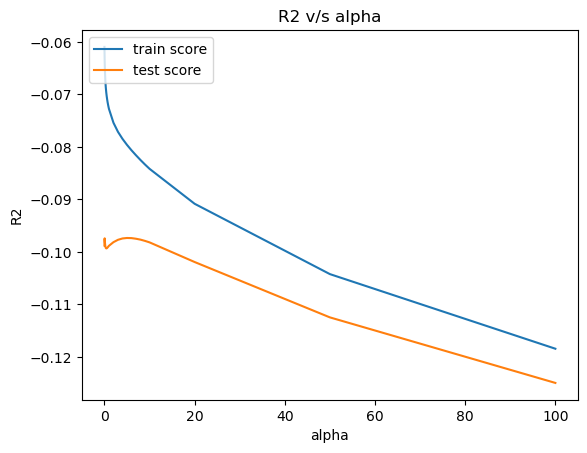

In [83]:
# plotting mean test and train scoes with alpha 
ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2')

plt.title("R2 v/s alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

##### Zoomed-in Plot

In [84]:
# Extracting data where alpha <=100
data_to_plot = ridge_cv_results[ridge_cv_results['param_alpha']<=20]
data_to_plot.shape

(24, 21)

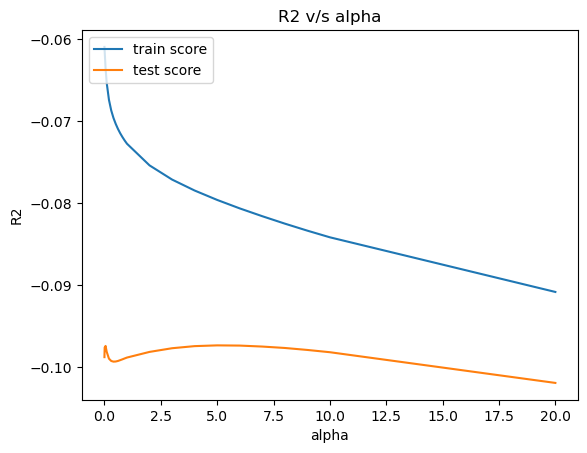

In [85]:
# plotting mean test and train scoes with alpha 
data_to_plot['param_alpha'] = data_to_plot['param_alpha'].astype('float32')

# plotting
plt.plot(data_to_plot['param_alpha'], data_to_plot['mean_train_score'])
plt.plot(data_to_plot['param_alpha'], data_to_plot['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2')

plt.title("R2 v/s alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

The value of best alpha i.e. 5 is quite visible here as at '5' the difference b/w the R square of training & test data is in the acceptable range considering the level of regularization.

#### Model Building

In [86]:
ridge_model = Ridge(alpha=best_alpha)
ridge_model.fit(df_train_X, df_train_y)

Ridge(alpha=5.0)

##### Calculating Metrics

In [87]:
# Training Data

# Doing Prediction
pred_train_y = ridge_model.predict(df_train_X)

# Getting metrics
r_square_train, rss_train, mse_train, rmse_train = metrics_calculator(df_train_y, pred_train_y)

# Creating metrics list
metric_row = [ 'Ridge','Training Data', r_square_train, rss_train, mse_train, rmse_train]

# Adding metrics list to the dataframe
metrics.loc[len(metrics)] = metric_row

metrics

,Model,Data,R_2,RSS,MSE,RMSE
0,Unreg,Training Data,9.439452e-01,8.994925e+00,8.809916e-03,9.386116e-02
1,Unreg,Test Data,-7.159542e+13,5.160763e+15,1.178256e+13,3.432574e+06
2,Ridge,Training Data,9.134112e-01,1.389463e+01,1.360884e-02,1.166569e-01


In [88]:
# Test Data

# Doing Prediction
pred_test_y = ridge_model.predict(df_test_X)

# Getting metrics
r_square_test, rss_test, mse_test, rmse_test = metrics_calculator(df_test_y, pred_test_y)

# Creating metrics list
metric_row = [ 'Ridge','Test Data', r_square_test, rss_test, mse_test, rmse_test]

# Adding metrics list to the dataframe
metrics.loc[len(metrics)] = metric_row

metrics

,Model,Data,R_2,RSS,MSE,RMSE
0,Unreg,Training Data,9.439452e-01,8.994925e+00,8.809916e-03,9.386116e-02
1,Unreg,Test Data,-7.159542e+13,5.160763e+15,1.178256e+13,3.432574e+06
2,Ridge,Training Data,9.134112e-01,1.389463e+01,1.360884e-02,1.166569e-01
3,Ridge,Test Data,9.043055e-01,6.897880e+00,1.574858e-02,1.254934e-01


In Ridge regression model, although the R square value of training data has reduced but it has drastically improved for test data. Also, the difference b/w the MSE of training & data test is also in the acceptable range.

### Lasso Regression Model

#### Hypertunning (Using GridSearchCV)

In [89]:
lasso_estimator = Lasso()

# GridSearchCV
lasso_cv_model = GridSearchCV(
            estimator = lasso_estimator,
            param_grid = params,
            scoring = 'neg_mean_absolute_error',
            cv = folds,
            return_train_score = True,
            verbose = 1)

lasso_cv_model.fit(df_train_X, df_train_y)

lasso_best_alpha = lasso_cv_model.best_params_['alpha']
lasso_best_alpha

Fitting 5 folds for each of 26 candidates, totalling 130 fits


0.0001

#### R square v/s Alpha Plot

In [90]:
lasso_cv_results = pd.DataFrame(lasso_cv_model.cv_results_)
lasso_cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.087217,0.022033,0.004013,0.002278,0.0001,{'alpha': 0.0001},-0.091831,-0.085203,-0.096662,-0.090294,...,-0.091568,0.003831,1,-0.067677,-0.068580,-0.065143,-0.064709,-0.065425,-0.066307,0.001532
1,0.025391,0.006926,0.006728,0.005060,0.001,{'alpha': 0.001},-0.099329,-0.092376,-0.100557,-0.087229,...,-0.095457,0.004973,2,-0.085160,-0.086313,-0.079911,-0.084564,-0.085859,-0.084361,0.002304
2,0.016010,0.001096,0.005204,0.000750,0.01,{'alpha': 0.01},-0.147148,-0.143160,-0.150915,-0.124808,...,-0.137563,0.011942,3,-0.133416,-0.130094,-0.128406,-0.132771,-0.134693,-0.131876,0.002294
3,0.013609,0.002873,0.005006,0.001416,0.05,{'alpha': 0.05},-0.272744,-0.233653,-0.243398,-0.240016,...,-0.237811,0.023500,4,-0.236029,-0.236171,-0.233088,-0.235816,-0.236669,-0.235555,0.001265
4,0.008988,0.004716,0.002802,0.001471,0.1,{'alpha': 0.1},-0.344022,-0.293312,-0.306635,-0.313130,...,-0.301781,0.030020,5,-0.300690,-0.298782,-0.298608,-0.300694,-0.308130,-0.301381,0.003491


##### Complete Plot

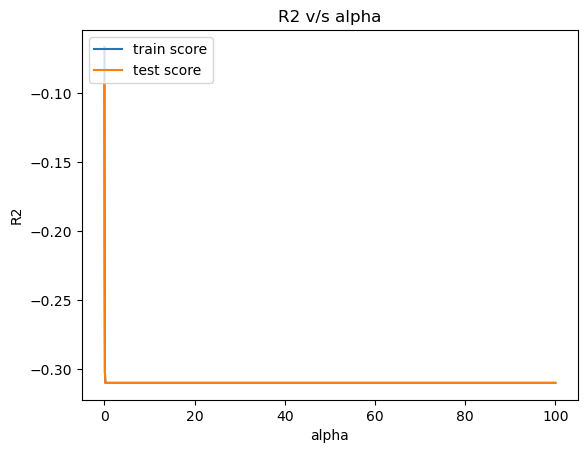

In [91]:
# plotting mean test and train scoes with alpha 
lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2')

plt.title("R2 v/s alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

##### Zoomed-in Plot

In [96]:
# Extracting data where alpha <=100
lasso_data_to_plot = lasso_cv_results[lasso_cv_results['param_alpha']<=0.05]
lasso_data_to_plot.shape

(4, 21)

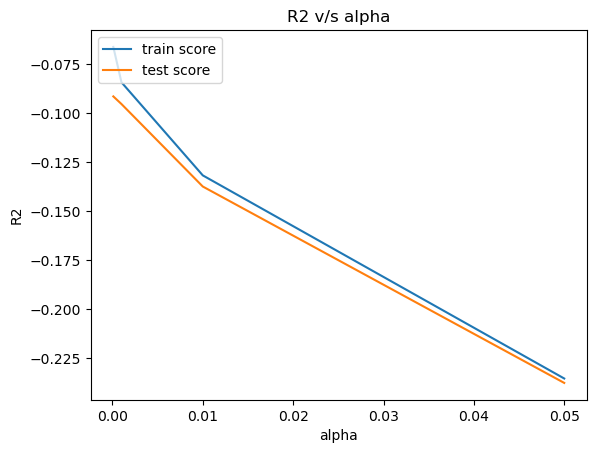

In [97]:
# plotting mean test and train scoes with alpha 
lasso_data_to_plot['param_alpha'] = lasso_data_to_plot['param_alpha'].astype('float32')

# plotting
plt.plot(lasso_data_to_plot['param_alpha'], lasso_data_to_plot['mean_train_score'])
plt.plot(lasso_data_to_plot['param_alpha'], lasso_data_to_plot['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2')

plt.title("R2 v/s alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### Model Building

In [98]:
lasso_model = Lasso(alpha=lasso_best_alpha)
lasso_model.fit(df_train_X, df_train_y)

Lasso(alpha=0.0001)

##### Calculating Metrics

In [99]:
# Training Data

# Doing Prediction
pred_train_y = lasso_model.predict(df_train_X)

# Getting metrics
r_square_train, rss_train, mse_train, rmse_train = metrics_calculator(df_train_y, pred_train_y)

# Creating metrics list
metric_row = [ 'Lasso','Training Data', r_square_train, rss_train, mse_train, rmse_train]

# Adding metrics list to the dataframe
metrics.loc[len(metrics)] = metric_row

metrics

,Model,Data,R_2,RSS,MSE,RMSE
0,Unreg,Training Data,9.439452e-01,8.994925e+00,8.809916e-03,9.386116e-02
1,Unreg,Test Data,-7.159542e+13,5.160763e+15,1.178256e+13,3.432574e+06
2,Ridge,Training Data,9.134112e-01,1.389463e+01,1.360884e-02,1.166569e-01
3,Ridge,Test Data,9.043055e-01,6.897880e+00,1.574858e-02,1.254934e-01
4,Lasso,Training Data,9.372256e-01,1.007320e+01,9.866013e-03,9.932780e-02


In [100]:
# Test Data

# Doing Prediction
pred_test_y = lasso_model.predict(df_test_X)

# Getting metrics
r_square_test, rss_test, mse_test, rmse_test = metrics_calculator(df_test_y, pred_test_y)

# Creating metrics list
metric_row = [ 'Lasso','Test Data', r_square_test, rss_test, mse_test, rmse_test]

# Adding metrics list to the dataframe
metrics.loc[len(metrics)] = metric_row

metrics

,Model,Data,R_2,RSS,MSE,RMSE
0,Unreg,Training Data,9.439452e-01,8.994925e+00,8.809916e-03,9.386116e-02
1,Unreg,Test Data,-7.159542e+13,5.160763e+15,1.178256e+13,3.432574e+06
2,Ridge,Training Data,9.134112e-01,1.389463e+01,1.360884e-02,1.166569e-01
3,Ridge,Test Data,9.043055e-01,6.897880e+00,1.574858e-02,1.254934e-01
4,Lasso,Training Data,9.372256e-01,1.007320e+01,9.866013e-03,9.932780e-02
5,Lasso,Test Data,8.178593e-01,1.312912e+01,2.997516e-02,1.731334e-01


Since, the R square value of test data in lasso model is quite less as compare to the test data on ridge model which indicates that 'Lasso' must have dropped some important variables that must have good correlation with the target variable. This is also quite evident from the MSE values as it increases for test data on Lasso Model.

Also, the difference b/w MSE of training & test data in Ridge regression is way better than that in Lasso regression.

Therefore, Ridge Regression should be preferred for this problem.

##### Model Coefficients

In [148]:
# Get the coefficients from the model
coefficients = lasso_model.coef_

# Create a DataFrame with column names and coefficients
coeff_df = pd.DataFrame({'Feature': df_train_X.columns, 'Coefficient': coefficients})

# Print the DataFrame
print(coeff_df.sort_values(by='Coefficient',ascending=False).reset_index(drop=True))

                  Feature  Coefficient
0        RoofMatl_WdShngl     1.581235
1        RoofMatl_CompShg     1.462451
2        RoofMatl_Tar&Grv     1.419074
3        RoofMatl_WdShake     1.379529
4               GrLivArea     1.089327
..                    ...          ...
212        BldgType_Twnhs    -0.093311
213      Utilities_NoSeWa    -0.166065
214  Neighborhood_MeadowV    -0.168459
215   Exterior1st_BrkComm    -0.353717
216       Condition2_PosN    -0.700904

[217 rows x 2 columns]


In [150]:
# No. of coefficients equal to 0
len(coeff_df[coeff_df['Coefficient']==0])

66

### Final Model Interpretation

Ridge Regression model is the ideal model for the given data

In [109]:
# Doing Prediction
pred_test_y = ridge_model.predict(df_test_X)

#### Regression Plot

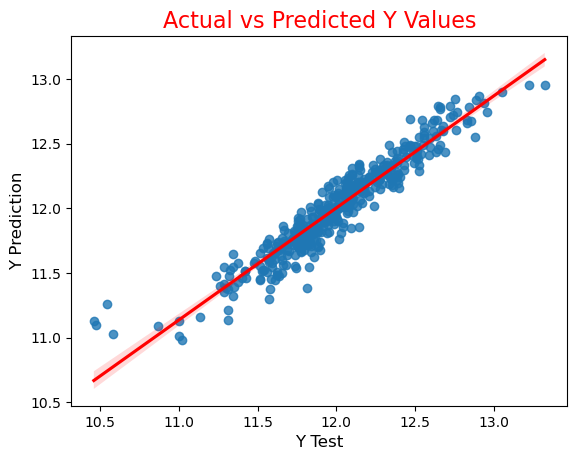

In [110]:
plt.figure()
sns.regplot(x=df_test_y, y=pred_test_y, fit_reg=True, line_kws={'color':'r'})

plt.title('Actual vs Predicted Y Values', fontsize = 16, color='r')               
plt.xlabel('Y Test', fontsize = 12)                   
plt.ylabel('Y Prediction', fontsize = 12)
plt.show()

#### Model Coefficents

In [111]:
# Get the coefficients from the model
coefficients = ridge_model.coef_

# Create a DataFrame with column names and coefficients
coeff_df = pd.DataFrame({'Feature': df_train_X.columns, 'Coefficient': coefficients})

# Print the DataFrame
print(coeff_df.sort_values(by='Coefficient',ascending=False).reset_index(drop=True))

                  Feature  Coefficient
0             OverallQual     0.311505
1               GrLivArea     0.216357
2             OverallCond     0.182909
3            TotRmsAbvGrd     0.173895
4                1stFlrSF     0.171709
..                    ...          ...
212   Neighborhood_IDOTRR    -0.084956
213         MSSubClass_30    -0.085057
214  Neighborhood_Edwards    -0.090740
215       Condition2_PosN    -0.122383
216  Neighborhood_MeadowV    -0.123436

[217 rows x 2 columns]


#### Conclusion

From the coefficient's values, the top 5 predictors are
1. OverallQual     
2. GrLivArea     
3. OverallCond     
4. TotRmsAbvGrd     
5. 1stFlrSF     

This is quite close to our EDA analysis.